## Load Basic Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Reading the csv file

In [44]:
df = pd.read_csv('heart.csv')

In [45]:
df = df.reset_index()


In [46]:
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [47]:
df['exang'].unique()



array([0, 1], dtype=int64)

In [48]:
df.shape

(303, 15)

## Exploring the data set in order to derive useful information

In [49]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

this shows our data has 303 rows and 14 columns

In [50]:
df.columns

Index(['index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

we can see the column names here 

In [51]:
df.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statstical Details
Describe provides us with statistical information in  the numerical format.
we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs 
mean of age is 54yrs.
The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles
or 4 equal parts. so 25% values lie in each group.
standard deviation and mean are statistical measures which give us an idea of the central tendency 
of the data set. However , mean is effected by outliers and hence we need more information 
to make accurate decisions.



0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [12]:
# Data set is not imbalanced
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
df.isnull().sum()

index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB
None


we notice that the dataset has no null values.
this saved us from conveting the null values into some data or dropping then altogether.

In [55]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Finding the correlation among the attributes

<AxesSubplot:>

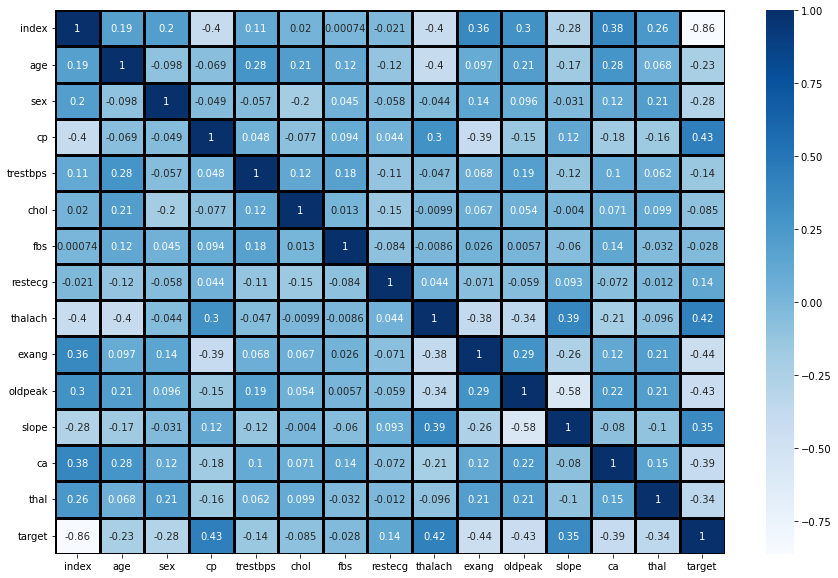

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=3, linecolor='k')

#### we observe positive correlation between target and cp, thalach,slope
#### and also negative correlation between target and sex, exang,ca,thai,oldpeak
#### Since cp, thalach and slope has high corr with target, doing univariate analysis of all these three features

In [57]:
df.drop(['age', 'sex'], axis=1)

,index,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,0,130,131,0,1,115,1,1.2,1,1,3,0


## Univariate analysis

In [58]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

### cp

In [59]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

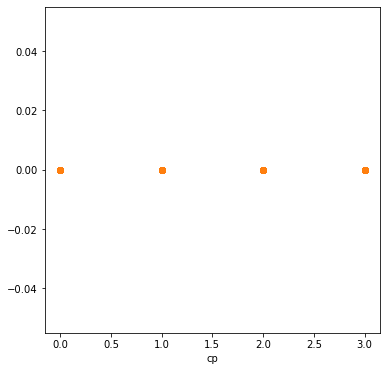

In [60]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]


plt.figure(figsize=(6, 6))
# since this is a categorical value we can skip this one
plt.plot(df_0['cp'],np.zeros_like(df_0['cp']),'o')
plt.plot(df_1['cp'],np.zeros_like(df_1['cp']),'o')



plt.xlabel('cp')
plt.show()

### thalach

No handles with labels found to put in legend.


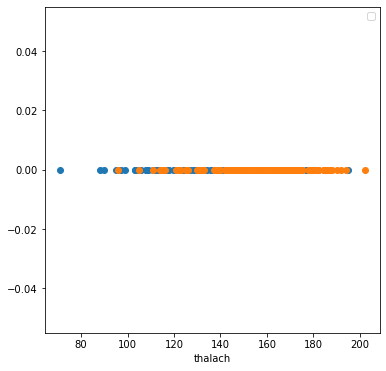

In [61]:
plt.figure(figsize=(6, 6))
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

plt.plot(df_0['thalach'],np.zeros_like(df_0['thalach']),'o')
plt.plot(df_1['thalach'],np.zeros_like(df_1['thalach']),'o')
plt.xlabel('thalach')

plt.legend()

### slope

In [62]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

No handles with labels found to put in legend.


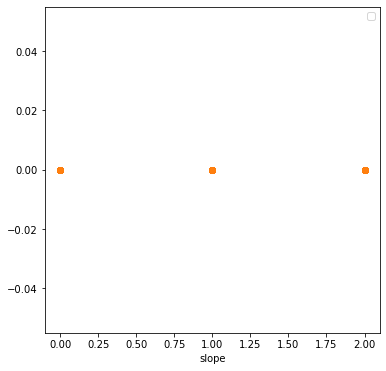

In [63]:
plt.figure(figsize=(6, 6))
plt.plot(df_0['slope'],np.zeros_like(df_0['slope']),'o')
plt.plot(df_1['slope'],np.zeros_like(df_1['slope']),'o')
plt.xlabel('slope')

plt.legend()

## Bivariate analysis

Text(0, 0.5, 'thalach')

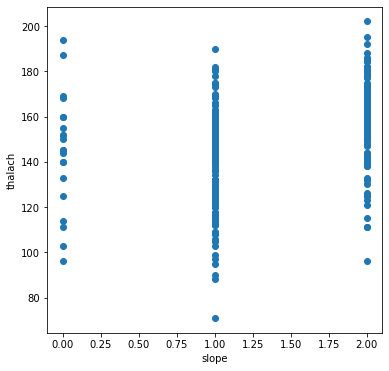

In [64]:
plt.figure(figsize=(6, 6))
plt.scatter(df['slope'], df['thalach'])

plt.xlabel('slope')
plt.ylabel('thalach')

Text(0, 0.5, 'target')

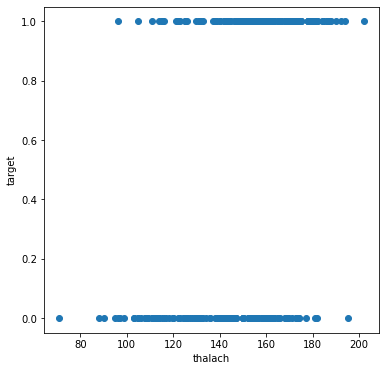

In [65]:
plt.figure(figsize=(6, 6))
plt.scatter(df['thalach'], df['target'])

plt.xlabel('thalach')
plt.ylabel('target')

Text(0, 0.5, 'target')

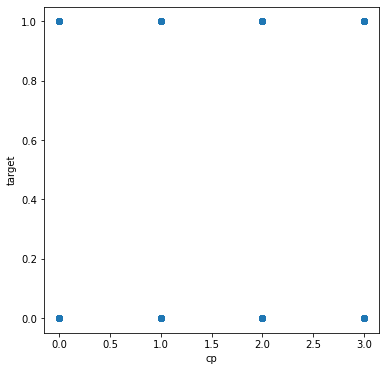

In [66]:
plt.figure(figsize=(6, 6))
plt.scatter(df['cp'], df['target'])

plt.xlabel('cp')
plt.ylabel('target')

Text(0, 0.5, 'target')

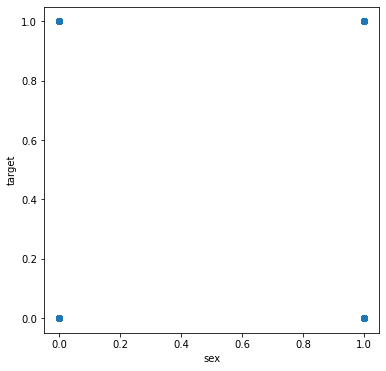

In [67]:
plt.figure(figsize=(6, 6))
plt.scatter(df['sex'], df['target'])

plt.xlabel('sex')
plt.ylabel('target')

## Multivariate analysis

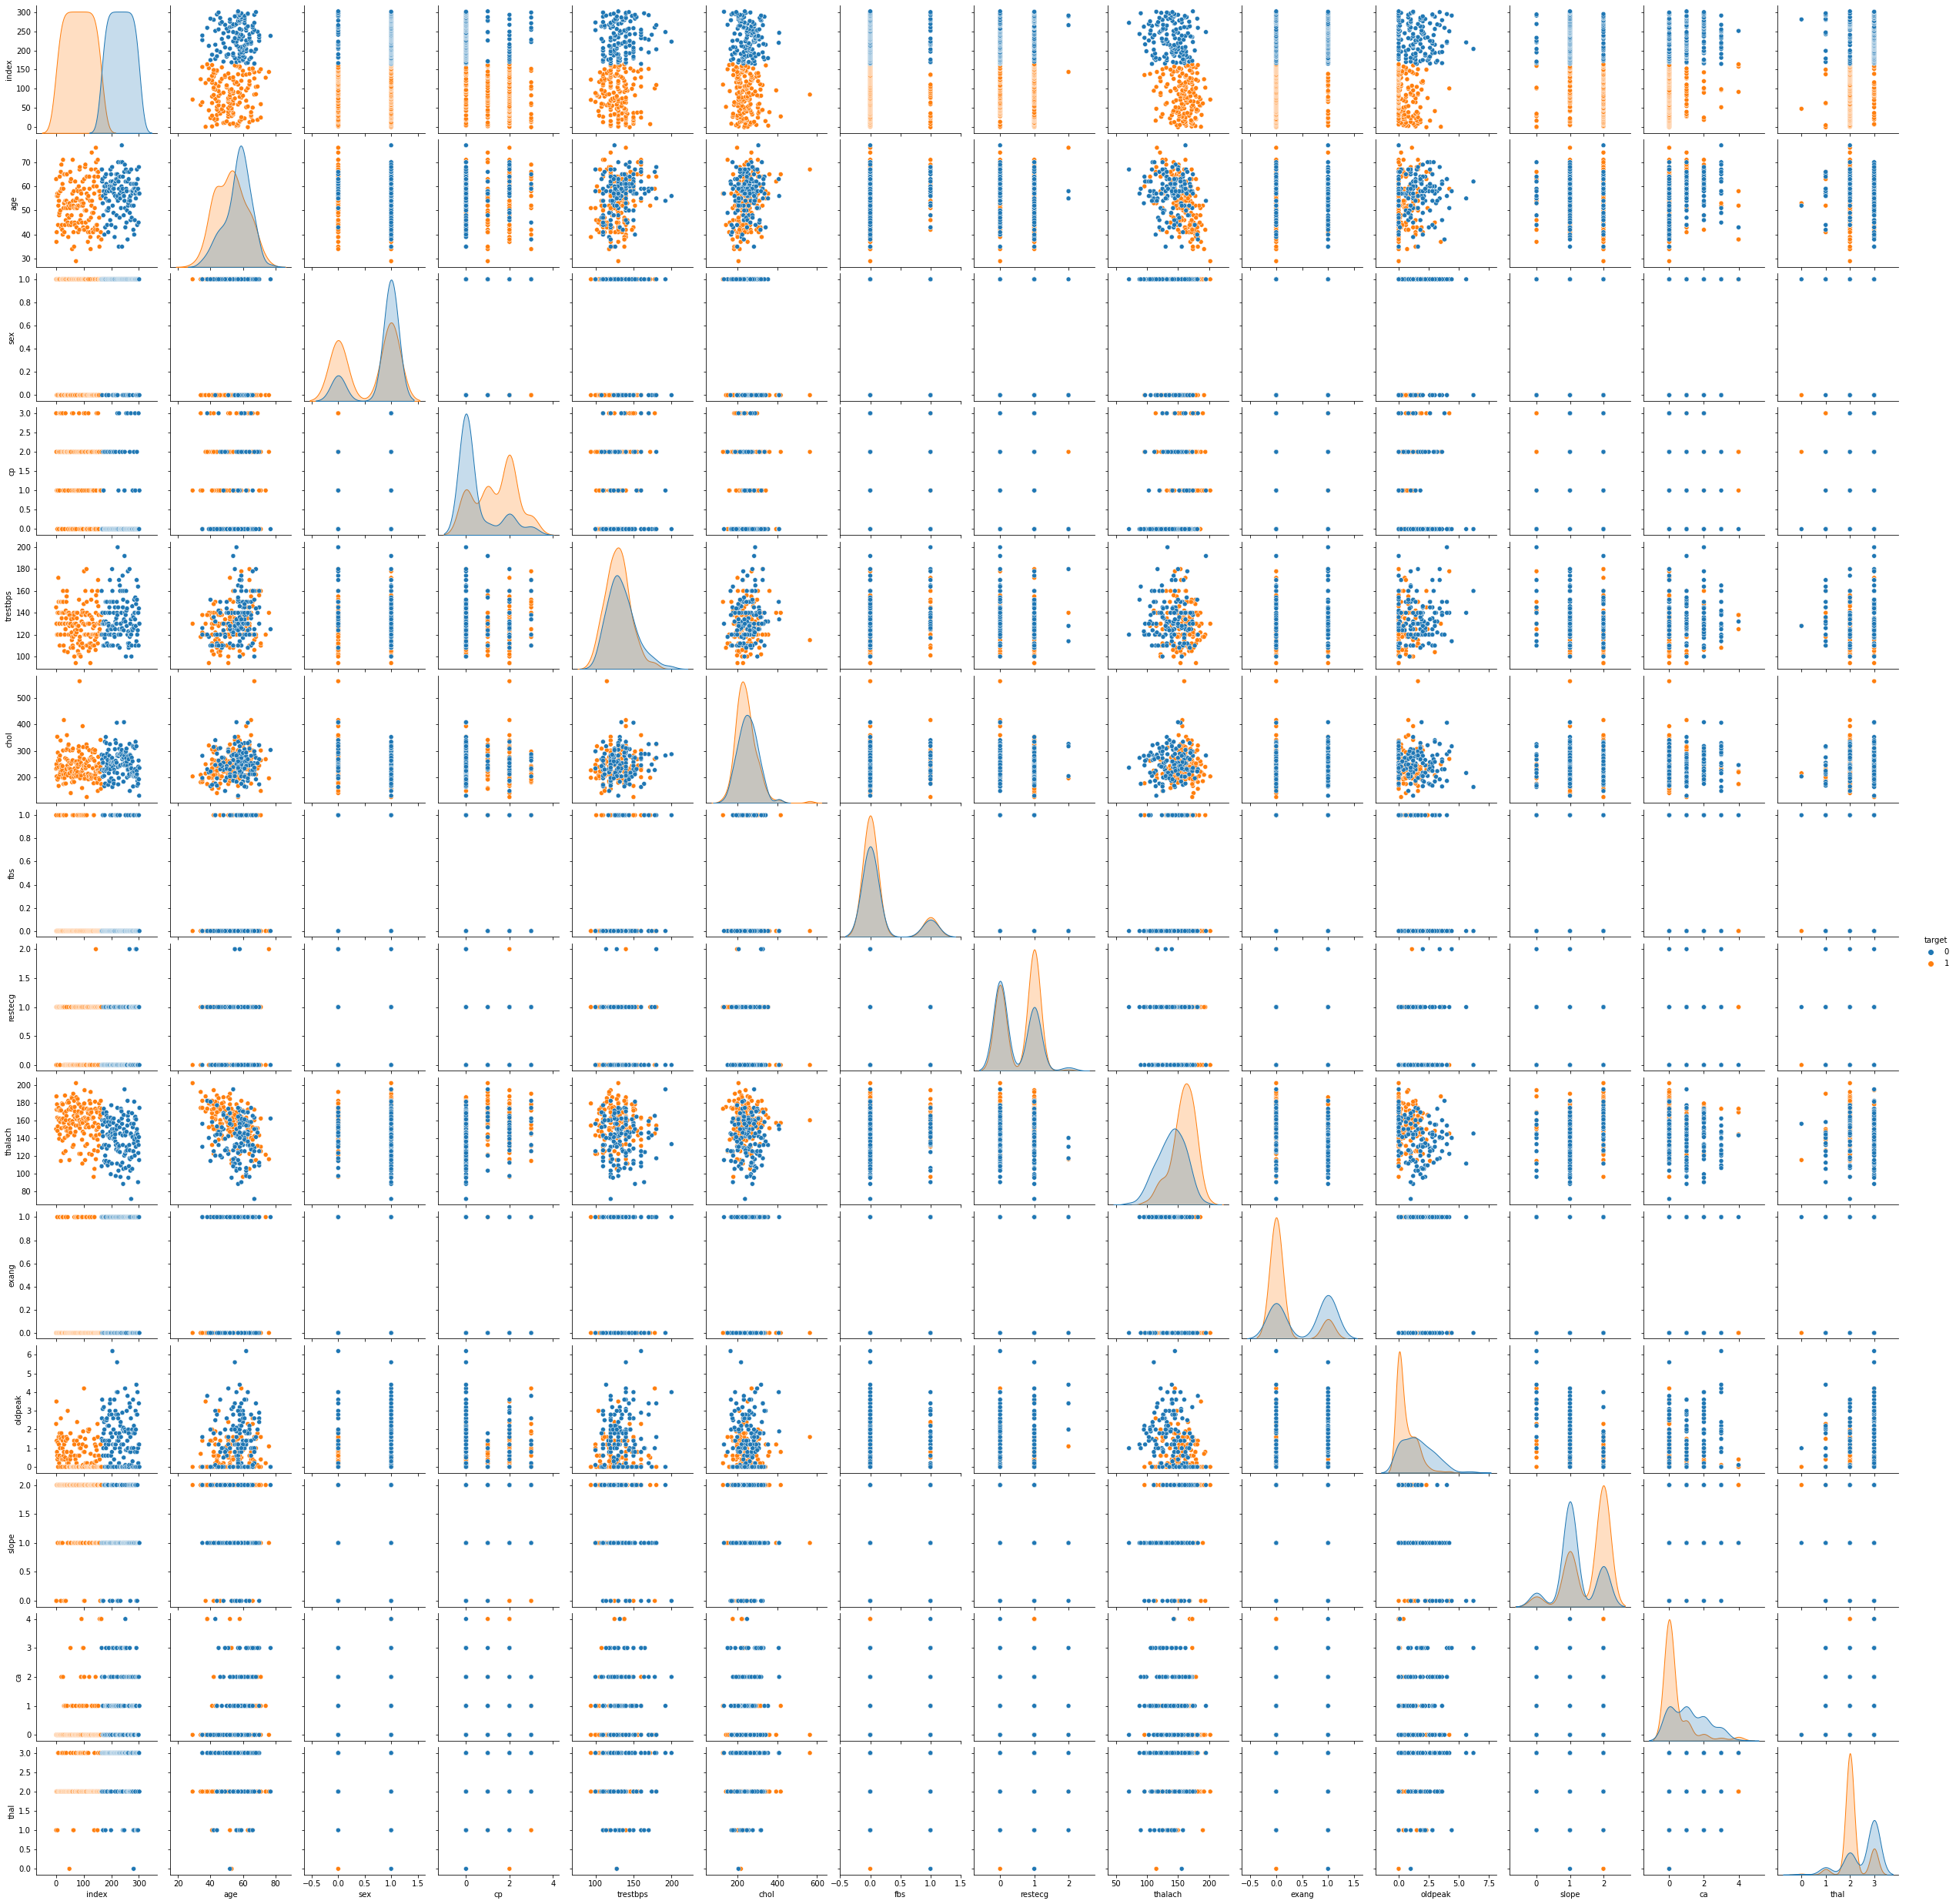

In [68]:
sns.pairplot(data=df, hue='target')

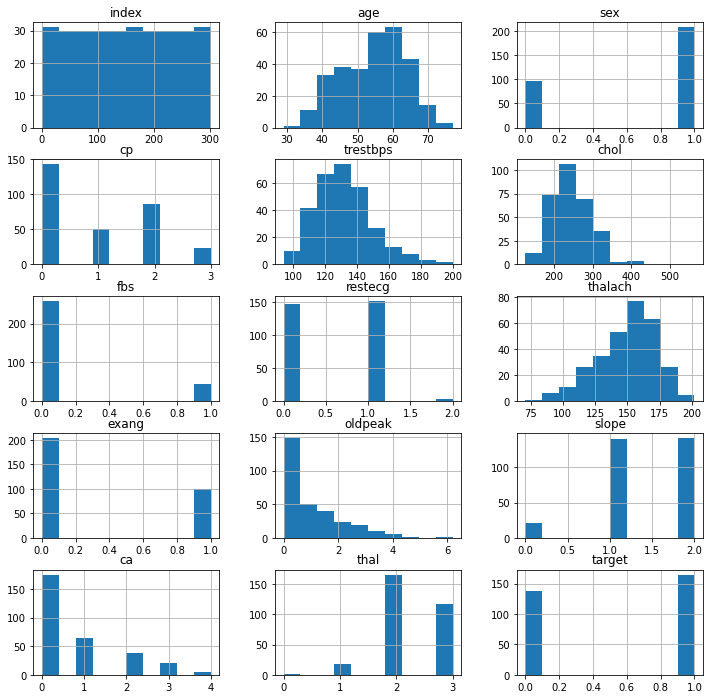

In [70]:
df.hist(figsize=(12,12), layout=(5,3));

In [71]:
# chol, trestbps, oldpeak and thalach

1.1434008206693387

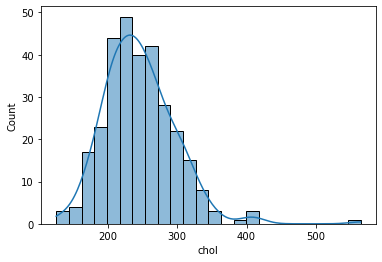

In [72]:
sns.histplot(df['chol'], kde=True)
df["chol"].skew()

0.08666713455435988

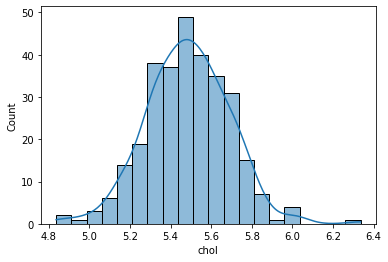

In [73]:
df["chol"]=df["chol"].transform(np.log)
sns.histplot(df['chol'], kde=True)
df["chol"].skew()

0.7137684379181465

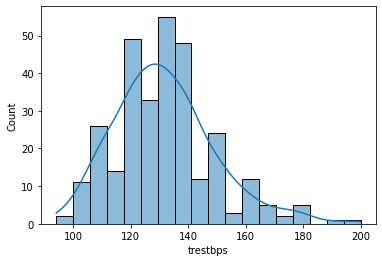

In [74]:
sns.histplot(df['trestbps'], kde=True)
df["trestbps"].skew()

0.2817574464672539

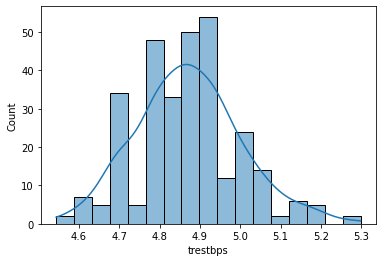

In [75]:
df["trestbps"]=df["trestbps"].transform(np.log)
sns.histplot(df['trestbps'], kde=True)
df["trestbps"].skew()

1.269719930601997

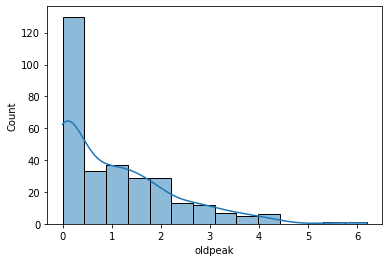

In [76]:
sns.histplot(df['oldpeak'], kde=True)
df["oldpeak"].skew()

nan

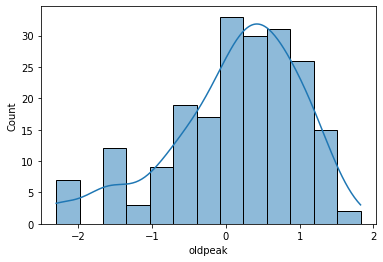

In [77]:
df["oldpeak"]=df["oldpeak"].transform(np.log)
sns.histplot(df['oldpeak'], kde=True)
df["oldpeak"].skew()

-0.5374096526832253

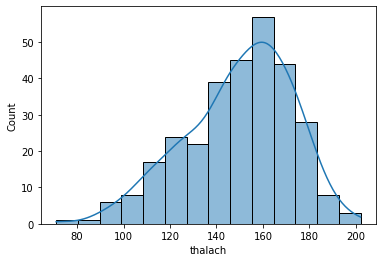

In [78]:
sns.histplot(df['thalach'], kde=True)
df["thalach"].skew()

-0.9994164387055479

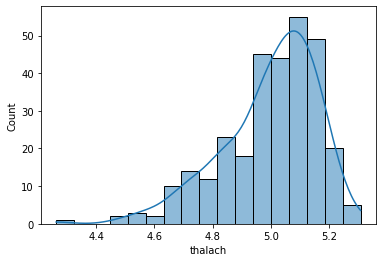

In [79]:
df["thalach"]=df["thalach"].transform(np.log)
sns.histplot(df['thalach'], kde=True)
df["thalach"].skew()

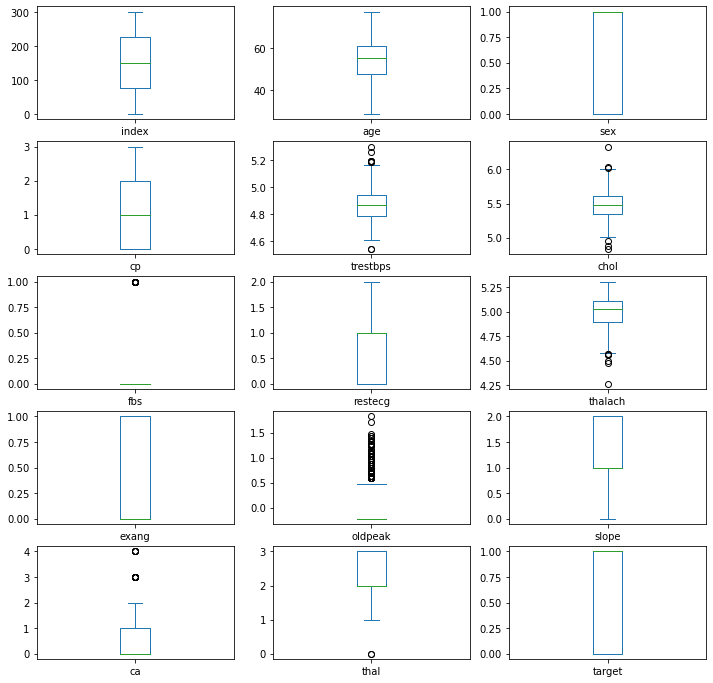

In [80]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

In [40]:
# box and whiskers plot
outlier.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12,12))
plt.show()

NameError: name 'outlier' is not defined

In [ ]:
outlier

NameError: name 'outlier' is not defined

In [ ]:
outlier.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

NameError: name 'outlier' is not defined

<AxesSubplot:xlabel='sex', ylabel='chol'>

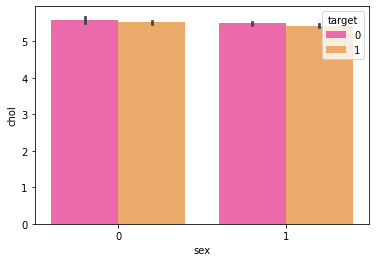

In [81]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [82]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

#### 207 males and 96 females

In [83]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### 165 cases of heart diseases
#### and 138 cases of no heart diseases

In [84]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

#### results of thallium stress test measuring blood flow to the heart,
with possible values normal, fixed_defect, reversible_defect

<AxesSubplot:xlabel='sex', ylabel='count'>

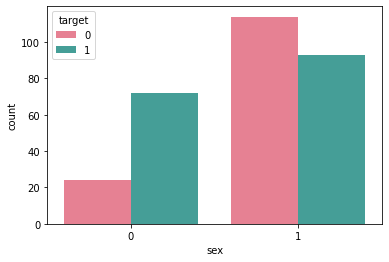

In [85]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

Here 1 means male and 0 denotes female. 
we observe female having heart disease are comparatively less when compared to males
Males have low heart diseases as compared to females in the given dataset.

<AxesSubplot:xlabel='target', ylabel='count'>

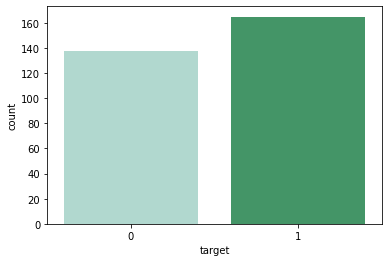

In [86]:
sns.countplot(x='target',palette='BuGn', data=df)

we observe the count for not having heart disease and having heart disease are almost balanced
not having frequency count is 140
and those having heart disease the count is 160.

<AxesSubplot:xlabel='ca', ylabel='count'>

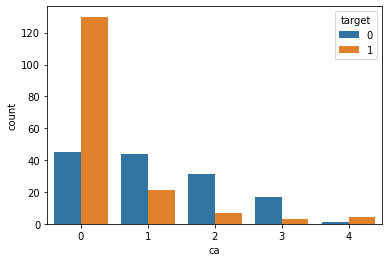

In [87]:
sns.countplot(x='ca',hue='target',data=df)

##### ca : number of major vessels (0-3) colored by flourosopy

In [88]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

ca number of major vessels (0-3) colored by flourosopy
ca has a negative corelation with the target i.e when ca will increase we witness a drop in 
heart diseases and vice versa.

<AxesSubplot:xlabel='thal', ylabel='count'>

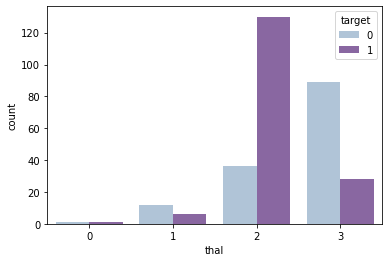

In [89]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

thal3 = normal; 6 = fixed defect; 7 = reversable defect

<AxesSubplot:xlabel='thal', ylabel='count'>

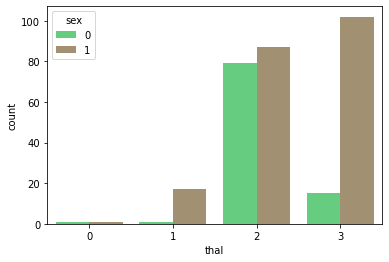

In [90]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [91]:
df['cp'].value_counts()  # chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

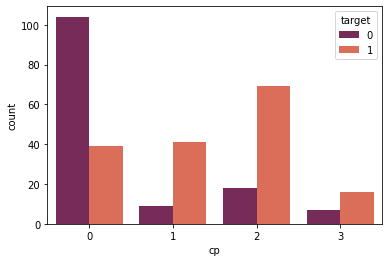

In [92]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

shows chest pain with respect to heart disease/ target

<AxesSubplot:xlabel='cp', ylabel='count'>

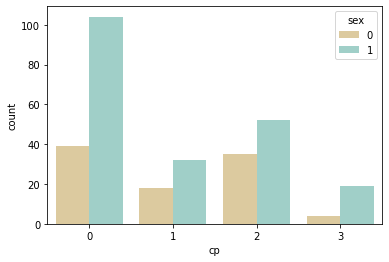

In [93]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

<AxesSubplot:xlabel='sex', ylabel='chol'>

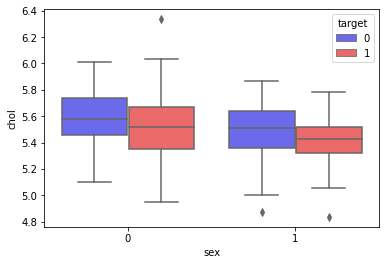

In [94]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

we observe the outliers with the help of boxplot. outliers are values that are very small 
or large in the given data set.

<AxesSubplot:xlabel='sex', ylabel='cp'>

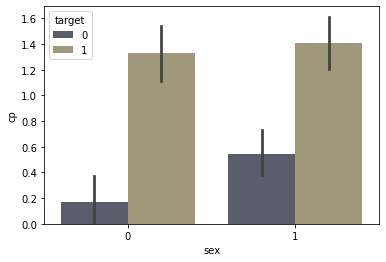

In [95]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

<AxesSubplot:xlabel='sex', ylabel='thal'>

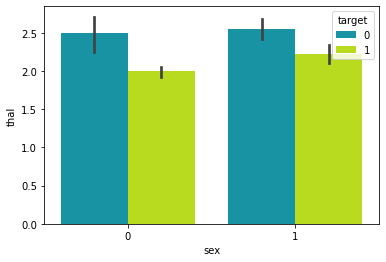

In [96]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

<AxesSubplot:xlabel='target', ylabel='ca'>

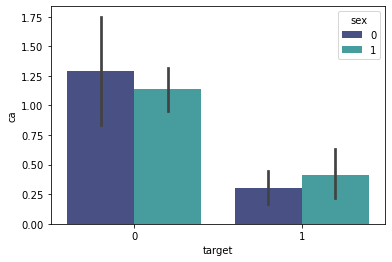

In [97]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

<AxesSubplot:xlabel='sex', ylabel='oldpeak'>

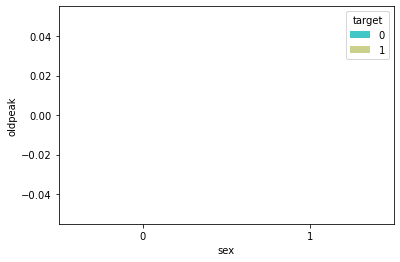

In [98]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

##### ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

### fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [99]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='chol'>

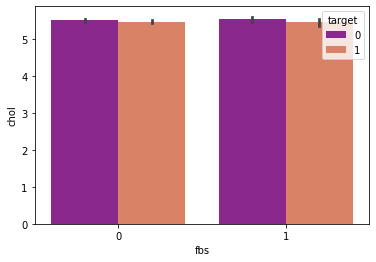

In [100]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma')

<AxesSubplot:xlabel='sex', ylabel='target'>

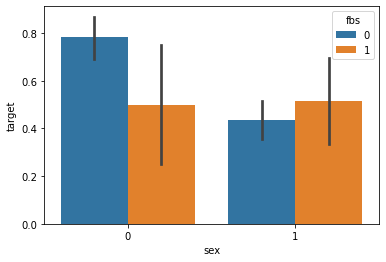

In [101]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

### Cross Tables

In [102]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


<AxesSubplot:xlabel='sex'>

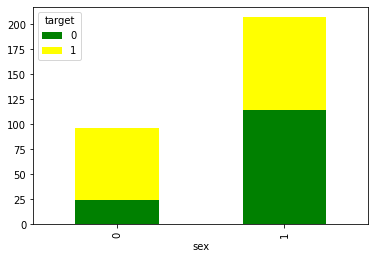

In [103]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [104]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


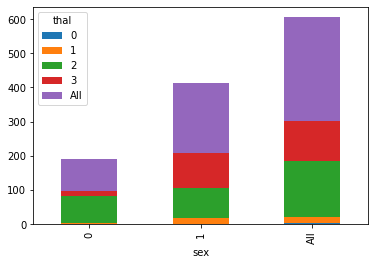

In [105]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [106]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,1,12,36,89,138
1,1,6,130,28,165
All,2,18,166,117,303


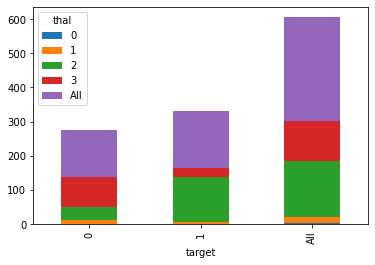

In [107]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [108]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

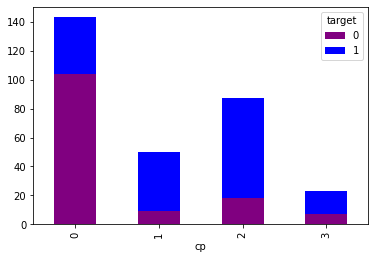

In [109]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [110]:
np.any(np.isnan(df))


False

In [111]:
np.all(np.isfinite(df))

False

In [114]:
df

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,4.976734,5.451038,1,0,5.010635,0,0.832909,0,0,1,1
1,1,37,1,2,4.867534,5.521461,0,1,5.231109,0,1.252763,0,0,2,1
2,2,41,0,1,4.867534,5.318120,0,0,5.147494,0,0.336472,2,0,2,1
3,3,56,1,1,4.787492,5.463832,0,1,5.181784,0,-0.223144,2,0,2,1
4,4,57,0,0,4.787492,5.869297,0,1,5.093750,1,-0.510826,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,4.941642,5.484797,0,1,4.812184,1,-1.609438,1,0,3,0
299,299,45,1,3,4.700480,5.575949,0,1,4.882802,0,0.182322,1,0,3,0
300,300,68,1,0,4.969813,5.262690,1,1,4.948760,0,1.223775,1,2,3,0
301,301,57,1,0,4.867534,4.875197,0,1,4.744932,1,0.182322,1,1,3,0


In [112]:
df['oldpeak']

0      0.832909
1      1.252763
2      0.336472
3     -0.223144
4     -0.510826
         ...   
298   -1.609438
299    0.182322
300    1.223775
301    0.182322
302        -inf
Name: oldpeak, Length: 303, dtype: float64

     index  age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
7        7   44    1   1  4.787492  5.572154    0        1  5.153292      0   
16      16   58    0   2  4.787492  5.828946    0        1  5.147494      0   
22      22   42    1   0  4.941642  5.420535    0        1  5.181784      0   
30      30   41    0   1  4.653960  5.288267    0        1  5.123964      0   
32      32   44    1   1  4.867534  5.389072    0        0  5.236442      0   
..     ...  ...  ...  ..       ...       ...  ...      ...       ...    ...   
283    283   40    1   0  5.023881  5.407172    0        1  5.198497      0   
287    287   57    1   1  5.036953  5.446737    0        0  5.099866      0   
290    290   61    1   0  4.997212  5.313206    0        1  5.081404      0   
296    296   63    0   0  4.820282  5.283204    0        1  4.912655      1   
302    302   57    0   1  4.867534  5.463832    0        0  5.159055      0   

     oldpeak  slope  ca  thal  target  
7       -in

# Preparing the data for Model Training

### Scaling the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,4.976734,5.451038,1,0,5.010635,0,0.832909,0,0,1,1
1,37,1,2,4.867534,5.521461,0,1,5.231109,0,1.252763,0,0,2,1
2,41,0,1,4.867534,5.318120,0,0,5.147494,0,0.336472,2,0,2,1
3,56,1,1,4.787492,5.463832,0,1,5.181784,0,-0.223144,2,0,2,1
4,57,0,0,4.787492,5.869297,0,1,5.093750,1,-0.510826,2,0,2,1


In [ ]:
X= df.drop(['target'], axis=1)
y= df['target']

In [ ]:
165 + 138

303

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

### Check the sample Size

In [ ]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


### 1- Logistic Regression

In [ ]:
# this list will contain scores of all the ensemble ML models and models which are base estimator of ensemble models
scores=[]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

<AxesSubplot:>

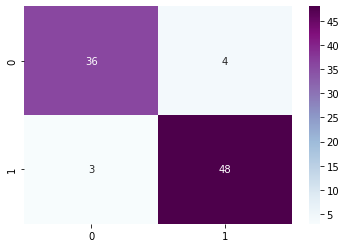

In [ ]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [ ]:
from sklearn.metrics import accuracy_score
scores.append(accuracy_score(y_test,prediction1))
accuracy_score(y_test,prediction1)

0.9230769230769231

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



## 2- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=2)
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [ ]:
cm2

array([[31,  9],
       [13, 38]], dtype=int64)

<AxesSubplot:>

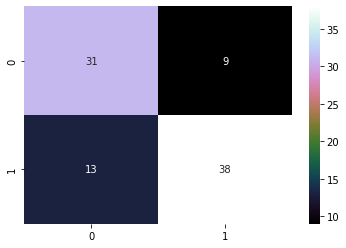

In [ ]:
sns.heatmap(cm2, annot=True,cmap='cubehelix')

In [ ]:
scores.append(accuracy_score(y_test,prediction2))
accuracy_score(y_test,prediction2)

0.7582417582417582

In [ ]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        40
           1       0.81      0.75      0.78        51

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



## 3- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(bootstrap=False,
 max_depth=6,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=10)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)

<AxesSubplot:>

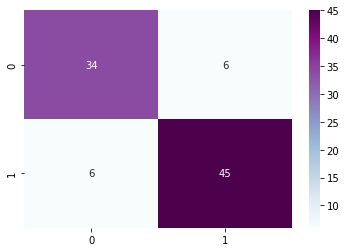

In [ ]:
sns.heatmap(cm3, annot=True,cmap='BuPu')

In [ ]:
scores.append(accuracy_score(y_test,prediction3))
accuracy_score(y_test,prediction3)

0.8681318681318682

In [ ]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



### 4- Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svm=SVC(kernel='linear', probability=True)
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [ ]:
cm4

array([[35,  5],
       [ 3, 48]], dtype=int64)

<AxesSubplot:>

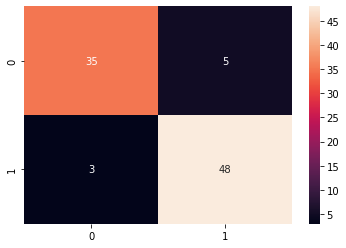

In [ ]:
sns.heatmap(cm4, annot=True)

In [ ]:
scores.append(accuracy_score(y_test,prediction4))
accuracy_score(y_test, prediction4)

0.9120879120879121

In [ ]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.91      0.94      0.92        51

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



### 5- Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing= 2e-9)
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5=confusion_matrix(y_test, prediction5)


In [ ]:
cm5

array([[35,  5],
       [ 6, 45]], dtype=int64)

<AxesSubplot:>

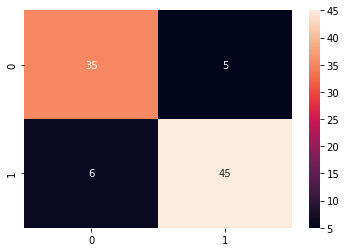

In [ ]:
sns.heatmap(cm5, annot=True)

In [ ]:
scores.append(accuracy_score(y_test,prediction5))
accuracy_score(y_test, prediction5)

0.8791208791208791

In [ ]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



### 6- KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6=confusion_matrix(y_test, prediction5)
cm6

array([[35,  5],
       [ 6, 45]], dtype=int64)

<AxesSubplot:>

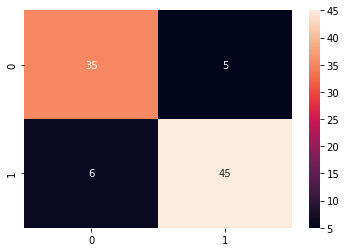

In [ ]:
sns.heatmap(cm6, annot=True)

In [ ]:
scores.append(accuracy_score(y_test,prediction6))
accuracy_score(y_test, prediction6)

0.8351648351648352

In [ ]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.85      0.86      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



### Scores

In [ ]:
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))
print('KNN :', accuracy_score(y_test, prediction6))

lr : 0.9230769230769231
dtc : 0.7582417582417582
rfc : 0.8681318681318682
NB:  0.9120879120879121
SVC : 0.8791208791208791
KNN : 0.8351648351648352


## Best accuracy is given by Logistic Regression : 92.3*


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model2, X_train, y_train, cv=5)
cv_score.mean()

0.7410852713178294

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model3, X_train, y_train, cv=5)
cv_score.mean()

0.769656699889258

### Random Forest Model with Hyperparameter tuning using GridSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4, 6, 8]
# Minimum number of samples required to split a node
min_samples_split = [2, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the paramaters grid
param_grid_1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid_1)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 50], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
E_model_1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_1, cv = 3, verbose=5, n_jobs = -1)
E_model_1

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [ ]:
E_model_1.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [ ]:
# print(accuracy_score(y_test, E_predicted_1))
scores.append(E_model_1.best_score_)
E_model_1.best_score_

0.8398390342052314

In [ ]:
E_model_1.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 25}

In [ ]:
E_prediction_1=E_model_1.predict(X_test)
accuracy_score(y_test, E_prediction_1)

0.8901098901098901

In [ ]:
print(classification_report(y_test, E_prediction_1))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        40
           1       0.94      0.86      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



<AxesSubplot:>

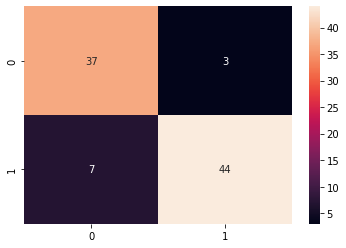

In [ ]:
E_cm_1=confusion_matrix(y_test, E_prediction_1)
sns.heatmap(E_cm_1, fmt='d', annot=True)

### Decision Tree Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
param_grid_2={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
E_model_2=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=10, n_jobs=-1)

In [ ]:
E_model_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [ ]:
E_prediction_2=E_model_2.predict(X_test)
accuracy_score(y_test, E_prediction_2)

0.7582417582417582

In [ ]:
print(classification_report(y_test, E_prediction_2))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76        40
           1       0.85      0.69      0.76        51

    accuracy                           0.76        91
   macro avg       0.77      0.77      0.76        91
weighted avg       0.78      0.76      0.76        91



<AxesSubplot:>

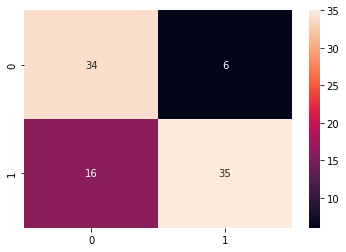

In [ ]:
E_cm_2=confusion_matrix(y_test, E_prediction_2)
sns.heatmap(E_cm_2, fmt='d', annot=True)

In [ ]:
scores.append(E_model_2.best_score_)
E_model_2.best_score_

0.7885281385281385

In [ ]:
E_model_2.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

### Adaboost Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ADC=AdaBoostClassifier(n_estimators=150, learning_rate=1.5)
E_model_3=ADC.fit(X_train, y_train)
E_predicted_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_predicted_3)

0.7802197802197802

In [ ]:
# Applying GridSearchCV
param_grid_3={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
E_model_3=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=10, scoring='accuracy')

In [ ]:
E_model_3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
E_prediction_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_prediction_3)

0.8681318681318682

In [ ]:
scores.append(E_model_3.best_score_)
E_model_3.best_score_

0.8162337662337661

<AxesSubplot:>

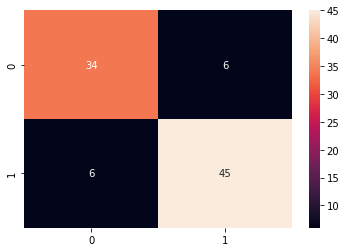

In [ ]:
E_cm_3=confusion_matrix(y_test, E_prediction_3)
sns.heatmap(E_cm_3, fmt='d', annot=True)

In [ ]:
print(classification_report(y_test, E_prediction_3))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
E_model_3.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}

### Gradient Boost Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC=GradientBoostingClassifier(n_estimators=16, learning_rate=1.59)
GradientBoostingClassifier()
E_model_4=GBC.fit(X_train, y_train)
E_predicted_4=E_model_4.predict(X_test)
accuracy_score(y_test, E_predicted_4)

0.8131868131868132

In [ ]:
#Applying GrirSearchCV
param_grid_4={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5]
}

In [ ]:
E_model_4=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=10, scoring='accuracy')
E_model_4.fit(X_train, y_train)
E_prediction_4 = E_model_4.predict(X_test)

In [ ]:
scores.append(E_model_4.best_score_)
E_model_4.best_score_

0.8028138528138526

In [ ]:
print(classification_report(y_test, E_prediction_4))

              precision    recall  f1-score   support

           0       0.82      0.78      0.79        40
           1       0.83      0.86      0.85        51

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



<AxesSubplot:>

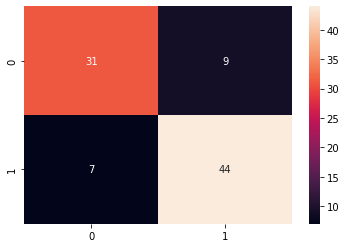

In [ ]:
E_cm_4=confusion_matrix(y_test, E_prediction_4)
sns.heatmap(E_cm_4, fmt='d', annot=True)

In [ ]:
E_model_4.best_params_

{'learning_rate': 0.05, 'n_estimators': 75}

In [ ]:
print(E_model_4)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')


### XgBoost Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
XGB=XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=45)
E_model_5=XGB.fit(X_train, y_train)
E_predicted_5=E_model_5.predict(X_test)
accuracy_score(y_test, E_predicted_5)

0.8241758241758241

In [ ]:
# Applying GridSearchCV
param_grid_5={
    'n_estimators': [10, 50, 75, 100, 175, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.5, 0.6],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

In [ ]:
E_model_5=GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5)
E_model_5.fit(X_train, y_train)
E_predicted_5=E_model_5.predict(X_test)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


In [ ]:
print(classification_report(y_test, E_predicted_5))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.88      0.86      0.87        51

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



<AxesSubplot:>

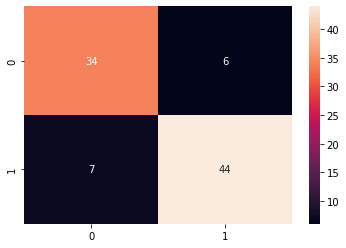

In [ ]:
E_cm_5=confusion_matrix(y_test, E_predicted_5)
sns.heatmap(E_cm_5, fmt='d', annot=True)

In [ ]:
E_model_5.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}

In [ ]:
scores.append(E_model_5.best_score_)
E_model_5.best_score_

0.8256921373200443

### LGBM Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
LGB=LGBMClassifier(n_estimators=45, learning_rate=0.065, num_leaves=30, random_state=42, objective='binary')
E_model_6=LGB.fit(X_train, y_train)
E_predicted_6=E_model_6.predict(X_test)
accuracy_score(y_test, E_predicted_6)



0.8351648351648352

In [ ]:
# Applying GridSearchCV
param_grid_6={
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.05, 0.1, 0.3],
    'num_leaves': [20, 50, 80, 100]
}

In [ ]:
E_model_6=GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
E_model_6.fit(X_train, y_train)
E_predicted_6=E_model_6.predict(X_test)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


<AxesSubplot:>

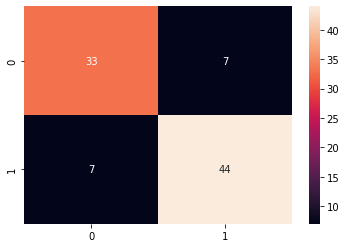

In [ ]:
E_cm_6=confusion_matrix(y_test, E_predicted_6)
sns.heatmap(E_cm_6, fmt='d', annot=True)

In [ ]:
print(classification_report(E_predicted_6, y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        40
           1       0.86      0.86      0.86        51

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
E_model_6.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 20}

In [ ]:
scores.append(E_model_6.best_score_)
E_model_6.best_score_

0.7978354978354979

## AUC for Ensemble Learning Models

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

### Logistic regression

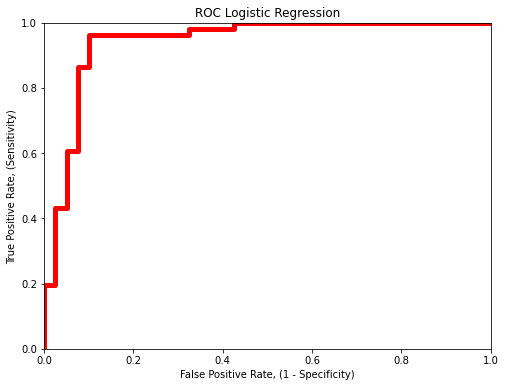

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Logistic Regression')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Support Vector Classifier

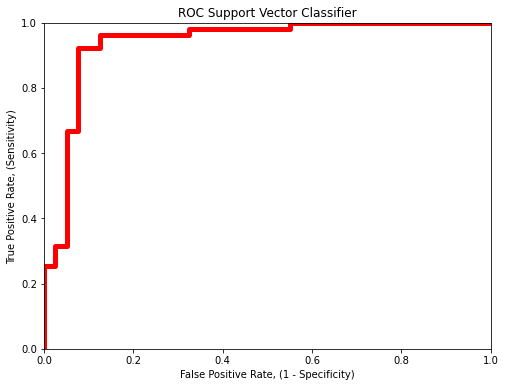

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, model4.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Support Vector Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Random Forest

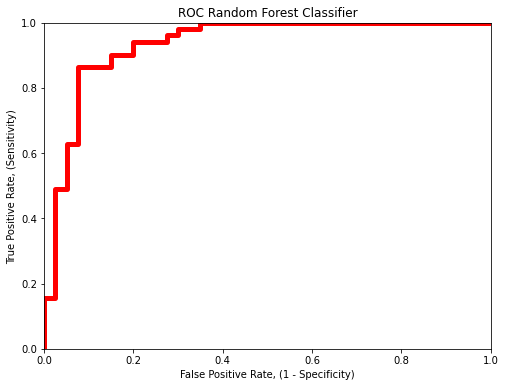

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, E_model_1.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Random Forest Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Decision Tree Classifier

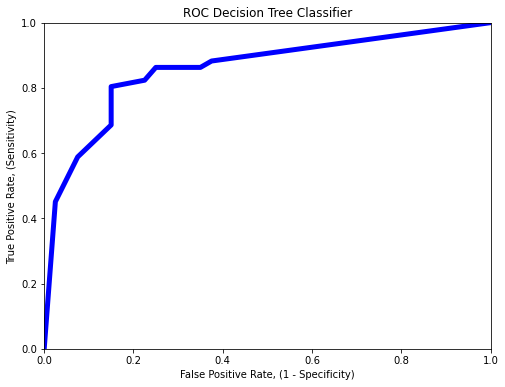

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, E_model_2.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='blue',lw=5)
plt.show()

### Naive Bayes

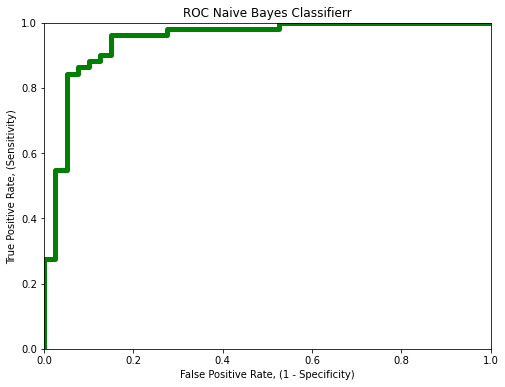

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, NB.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Naive Bayes Classifierr')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### KNN

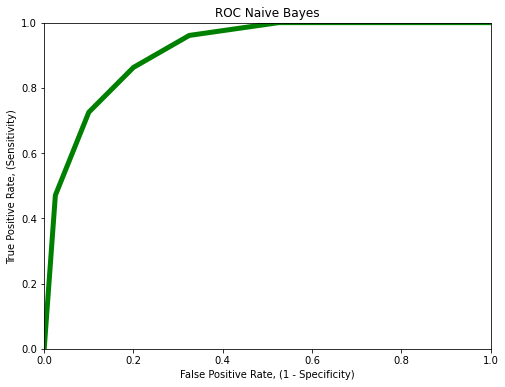

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, KNN.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Naive Bayes')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### AdaBoost Classifier

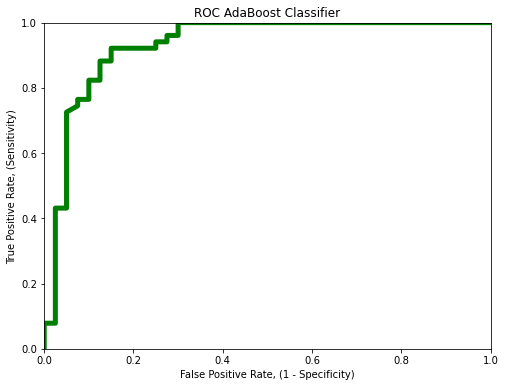

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, E_model_3.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC AdaBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### GradientBoosting Classifier

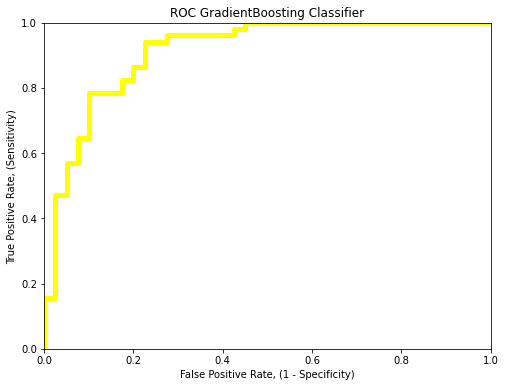

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, E_model_4.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC GradientBoosting Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='yellow',lw=5)
plt.show()

### XgBoost Classifier

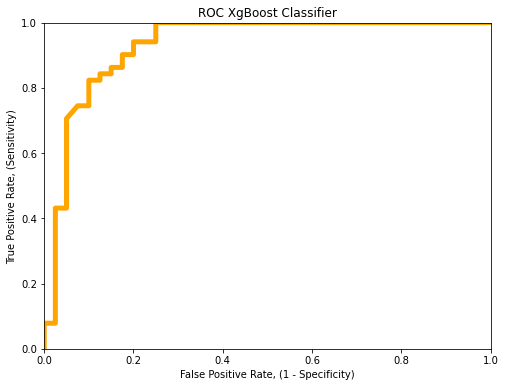

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, E_model_5.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC XgBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='orange',lw=5)
plt.show()

### Light GBMClassifier

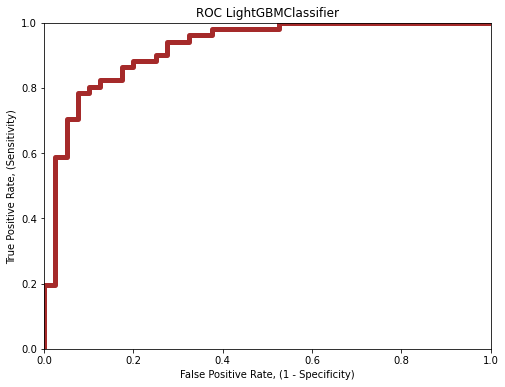

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, E_model_6.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC LightGBMClassifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='brown',lw=5)
plt.show()

## Analysis of Models

In [ ]:
names=["Logistic Regression", "Decision Tree Classifier", "Random Forest", "Linear_SVM", "Naive_Bayes", "KNN", "Logistic Regression_CV", 
         "Decision Tree_CV", "Adaboost_CV", "Gradient Boost_CV", "XgBoost_CV", "LGMB_CV"]

In [ ]:
scores

[0.9230769230769231,
 0.7582417582417582,
 0.8681318681318682,
 0.9120879120879121,
 0.8791208791208791,
 0.8351648351648352,
 0.8398390342052314,
 0.7885281385281385,
 0.8162337662337661,
 0.8028138528138526,
 0.8256921373200443,
 0.7978354978354979]

In [ ]:
df_stat = pd.DataFrame()
df_stat['models'] = names
df_stat['score'] = scores
df_stat

,models,score
0,Logistic Regression,0.923077
1,Decision Tree Classifier,0.758242
2,Random Forest,0.868132
3,Linear_SVM,0.912088
4,Naive_Bayes,0.879121
5,KNN,0.835165
6,Logistic Regression_CV,0.839839
7,Decision Tree_CV,0.788528
8,Adaboost_CV,0.816234
9,Gradient Boost_CV,0.802814


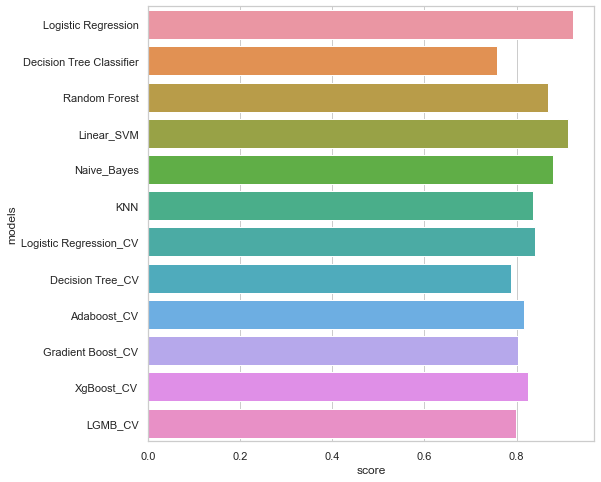

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
ax = sns.barplot(y="models", x="score", data=df_stat)

<Figure size 432x288 with 0 Axes>

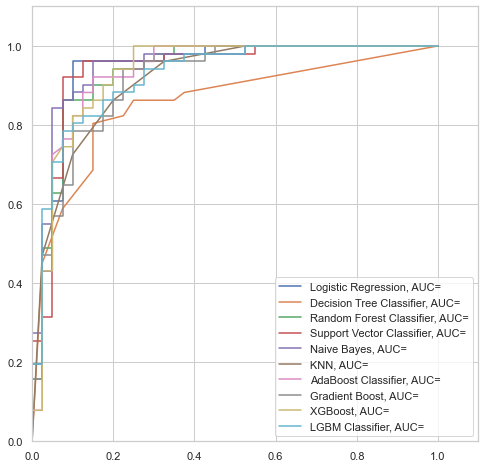

In [ ]:
from sklearn import metrics
plt.figure(0).clf()

plt.figure(figsize=(8, 8))

y_pred = model1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC=" )

y_pred = E_model_2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC=" )


y_pred = E_model_1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC=" )

y_pred = model4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier, AUC=" )

y_pred = NB.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC=" )

y_pred = KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC=" )

y_pred = E_model_3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost Classifier, AUC=" )

y_pred = E_model_4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boost, AUC=" )

y_pred = E_model_5.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC=" )

y_pred = E_model_6.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LGBM Classifier, AUC=" )
plt.xlim(0,1.1)
plt.ylim(0,1.1)
#add legend
plt.legend()
plt.savefig("ROCsHeart.png")
plt.show()

<Figure size 432x288 with 0 Axes>

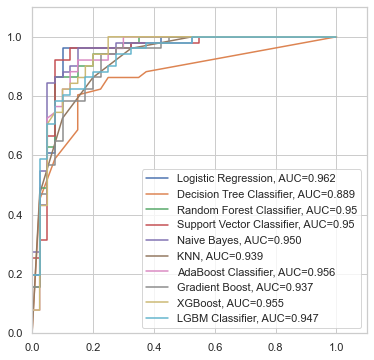

In [ ]:

###################FINALFINALFINALFINALFINALFINALFINALFINALFINALFINALFINALFINALFINALFINALFINALFINALFINAL


from sklearn import metrics
plt.figure(0).clf()

plt.figure(figsize=(6, 6))

y_pred = model1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC=0.962")

y_pred = E_model_2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC=0.889" )


y_pred = E_model_1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC=0.95" )

y_pred = model4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier, AUC=0.95" )

y_pred = NB.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC=0.950")

y_pred = KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC=0.939" )

y_pred = E_model_3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost Classifier, AUC=0.956" )

y_pred = E_model_4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boost, AUC=0.937" )

y_pred = E_model_5.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC=0.955" )



y_pred = E_model_6.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LGBM Classifier, AUC=0.947" )
plt.xlim(0,1.1)
plt.ylim(0,1.1)
#add legend
plt.legend()
plt.savefig("ROCsHeart.png")
plt.show()